# internal wave beam reflecting against a slope

see Gerkema p106



In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

---
## 

Inputs: 

- beam shape $F$
- frequency $\omega$
- amplitude $w_0$
- stratification $N$
- Coriolis frequency $f$
- seafloor slope $\gamma$ : $z=\gamma x$


In [2]:

def get_mu(omega, f, N):
    return np.sqrt( (omega**2 - f**2)/(N**2-omega**2)  )

def get_lambda(omega, f, N, gamma):
    mu = get_mu(omega, f, N)
    return (gamma-mu)/(gamma+mu)




In [19]:
lat = 43
f = 2 *2*np.pi/86164.1 * np.sin(lat*np.pi/180)
omega = f*1.1
N = 1e-3
gamma = -.1

k = 2*np.pi/50.

F = lambda xi: np.exp(-(xi/200.)**2)*np.exp(1j*k*xi)

mu =  get_mu(omega, f, N)
la =  get_lambda(omega, f, N,  gamma)


G = lambda xi: la*F(la*xi)

print(f" mu = {mu:.1e}, gamma={gamma:.2f}")

 mu = 4.6e-02, gamma=-0.10


In [25]:
ds = xr.Dataset(dict(x=np.arange(-10e3,10e3,1e2),
                     z=np.arange(-1e3,1e3,10),
                    ))
ds["h"] = -gamma*ds.x

xi_p =  mu*ds.x - ds.z
xi_m = -mu*ds.x - ds.z

ds["F"] = F(xi_p).where(ds.z+0.*ds.x>-ds.h)
ds["G"] = G(xi_m).where(ds.z+0.*ds.x>-ds.h)

Text(0.5, 1.0, 'incident')

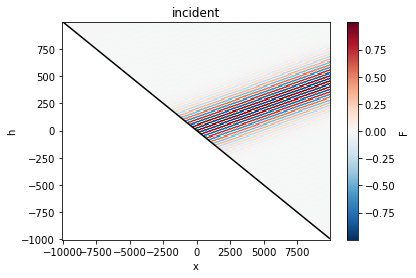

In [28]:
fig, ax = plt.subplots(1,1)
np.real(ds.F).plot(x="x")
(-ds["h"]).plot(color="k")
ax.set_title("incident")

Text(0.5, 1.0, 'reflected')

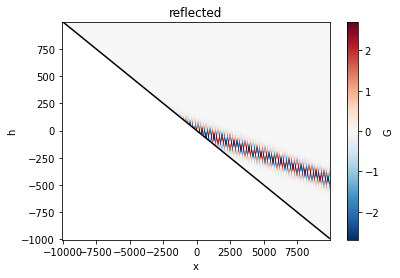

In [29]:
fig, ax = plt.subplots(1,1)
np.real(ds.G).plot(x="x")
(-ds["h"]).plot(color="k")
ax.set_title("reflected")